<a href="https://colab.research.google.com/github/jiyanshud22/Affective-Computing/blob/main/CS786A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS786** Assignment 3
---




### *Jiyanshu* *Dhaka* *220481*

as the code of github link wasn't working because of different version of python so I modified createimage.py and extracted all  data and made zip file and uploaded on drive and then extracted zip file here.
also i modified train_incep3 & test_incep3 below is the code.

In [3]:
pip install tensorflow keras matplotlib scikit-learn


i can extract that zip file of google drive to get the data.

In [4]:
from google.colab import drive
import os
import zipfile

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the zip file and extract it
zip_file_path = "/content/drive/MyDrive/data.zip"
extract_path = "/content/data"

# Unzip the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify the extracted files and folder structure
for root, dirs, files in os.walk(extract_path):
    print(f"Checking: {root}")
    for file in files:
        print(f"Found file: {file}")

# Set the correct path to the dataset
data_path = "/content/data/data/symmetry_global/ds1"

print(f"Data path set to: {data_path}")


Streaming output truncated to the last 5000 lines.
Found file: 2330.png
Found file: 6.png
Found file: 1813.png
Found file: 2053.png
Found file: 1642.png
Found file: 2500.png
Found file: 1383.png
Found file: 2162.png
Found file: 489.png
Found file: 3479.png
Found file: 924.png
Found file: 3027.png
Found file: 1058.png
Found file: 1748.png
Found file: 1143.png
Found file: 3193.png
Found file: 231.png
Found file: 1087.png
Found file: 3130.png
Found file: 1475.png
Found file: 3537.png
Found file: 2231.png
Found file: 805.png
Found file: 341.png
Found file: 2269.png
Found file: 960.png
Found file: 2538.png
Found file: 2854.png
Found file: 871.png
Found file: 3984.png
Found file: 447.png
Found file: 1862.png
Found file: 1070.png
Found file: 1474.png
Found file: 1219.png
Found file: 1916.png
Found file: 3691.png
Found file: 1065.png
Found file: 1029.png
Found file: 2275.png
Found file: 3703.png
Found file: 869.png
Found file: 1991.png
Found file: 2705.png
Found file: 1410.png
Found file: 1650

# corrected inception v3 code

In [1]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Set the paths to the training and validation directories
train_data_path = "/content/data/data/symmetry_global/ds1/train"
valid_data_path = "/content/data/data/symmetry_global/ds1/valid"

# Function to build the InceptionV3 model
def build_inceptionV3(input_shape):
    input_tensor = Input(shape=input_shape)
    base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(2, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze some layers to save memory
    for layer in base_model.layers[:-10]:
        layer.trainable = False

    return base_model, model

# Create data generators for training and validation data
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=5,
    width_shift_range=0.02,
    height_shift_range=0.02,
    horizontal_flip=True,
    vertical_flip=True
)

train_generator = datagen.flow_from_directory(
    train_data_path,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical'
)

valid_generator = datagen.flow_from_directory(
    valid_data_path,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical'
)

# Build and compile the model
base_model, model = build_inceptionV3(input_shape=(150, 150, 3))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping and model checkpointing
model.fit(
    train_generator,
    epochs=70,
    validation_data=valid_generator,
    callbacks=[
        EarlyStopping(monitor='val_accuracy', patience=10),
        ModelCheckpoint(
            "model-{epoch:02d}-{val_accuracy:.2f}.weights.h5",
            monitor='val_accuracy', save_best_only=True, save_weights_only=True
        )
    ]
)

# Save the final model weights
model.save_weights("final_model_weights.weights.h5")
print("Saved last weights to disk")


Found 8000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/70


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 862s 852ms/step - accuracy: 0.8635 - loss: 0.5176 - val_accuracy: 0.9329 - val_loss: 0.2101
Epoch 2/70
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 849s 839ms/step - accuracy: 0.9352 - loss: 0.1963 - val_accuracy: 0.9410 - val_loss: 0.1786
Epoch 3/70
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 843s 843ms/step - accuracy: 0.9432 - loss: 0.1714 - val_accuracy: 0.9475 - val_loss: 0.1546
Epoch 4/70
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.9543 - loss: 0.1538

KeyboardInterrupt: 

execution is very time taking in colab so i stopped this code after 4 epoch and I had already run this on my local system so here is the terminal. i have also added text file of terminal in zip.  terminal for train_incep3 was:


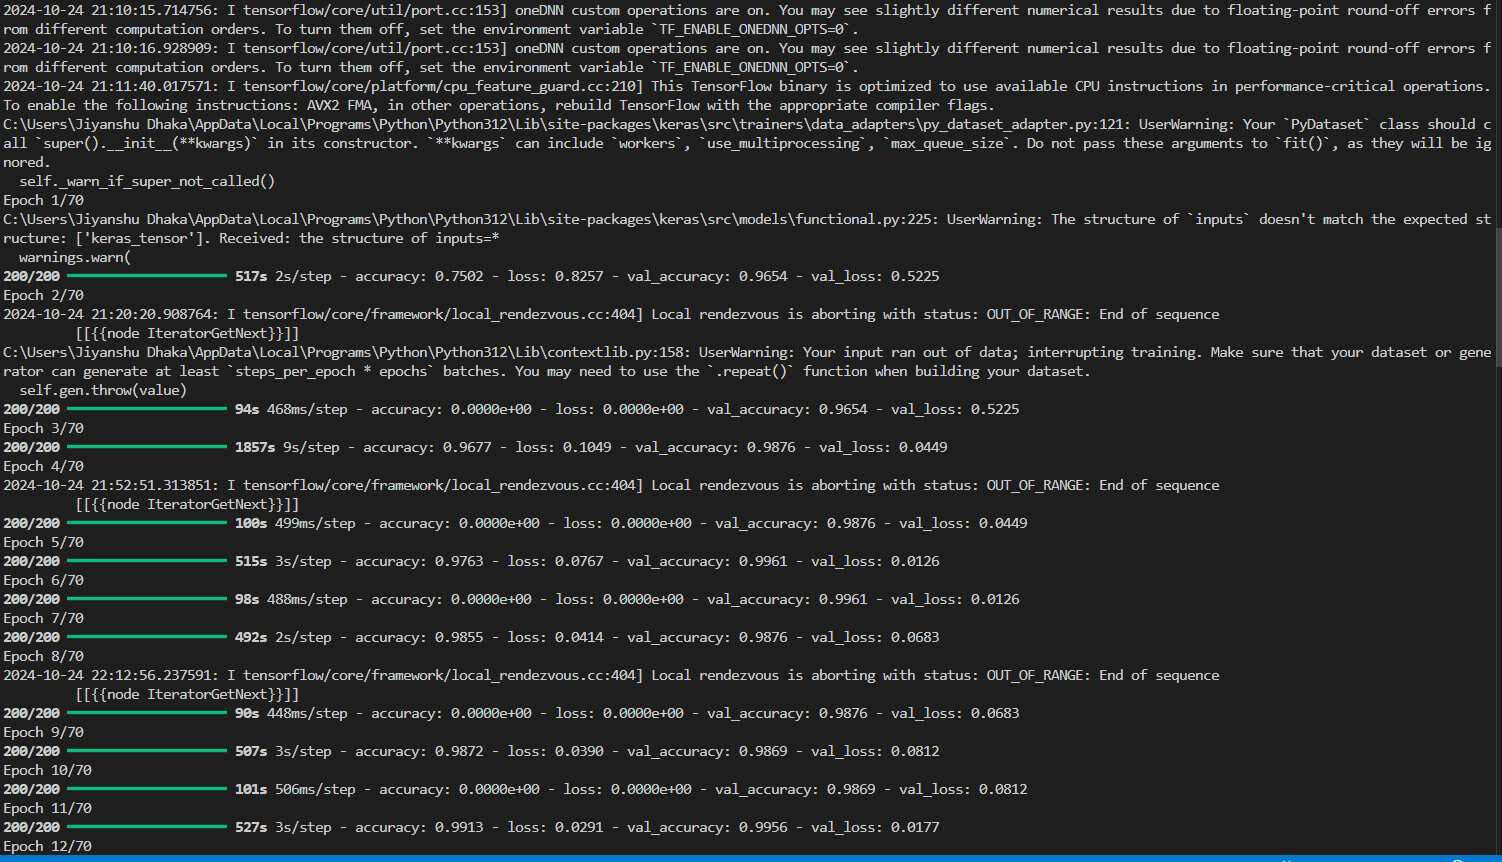

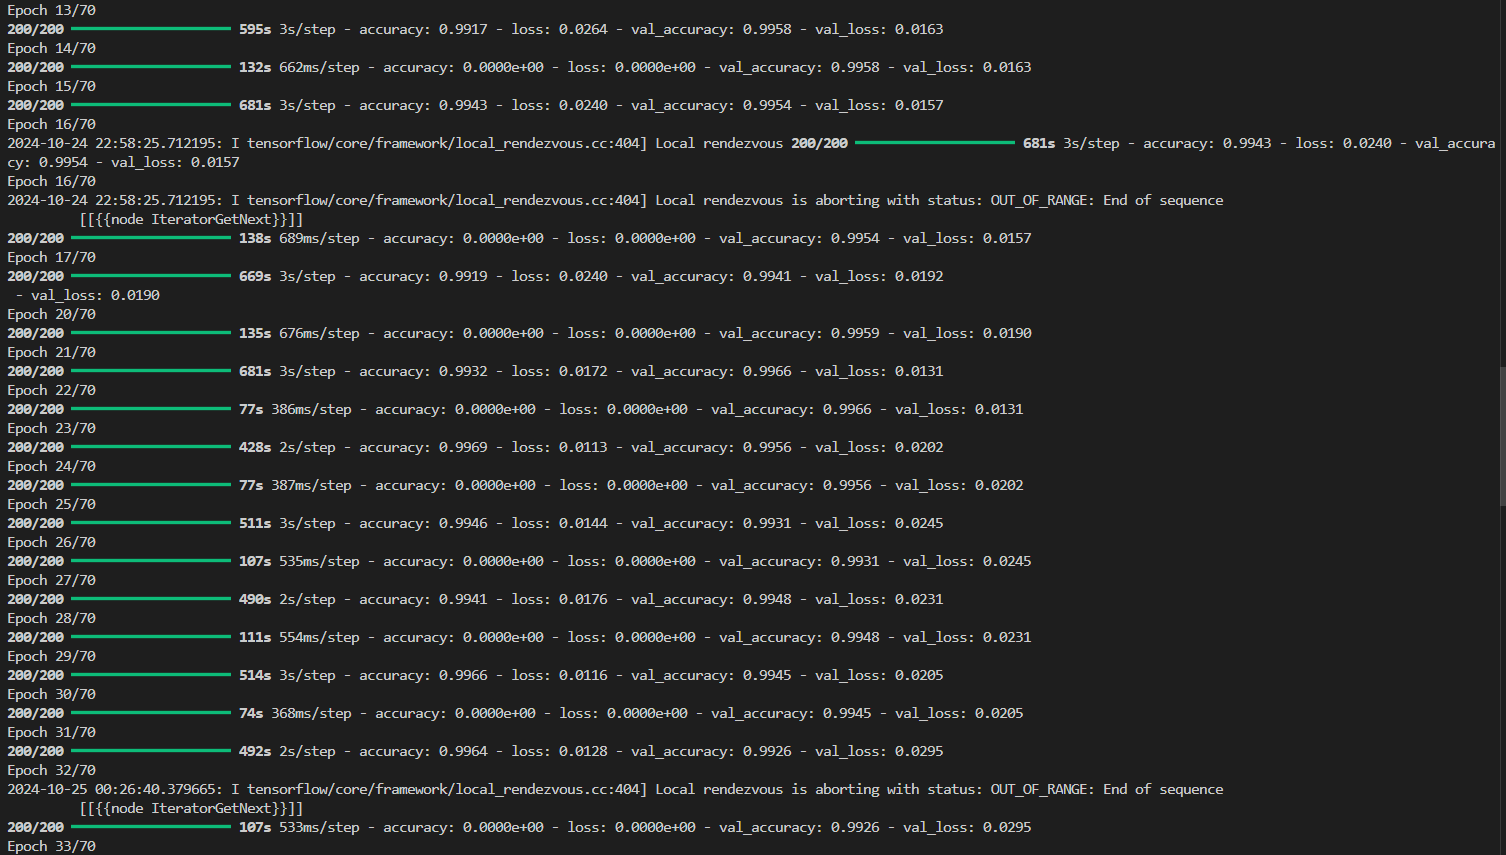

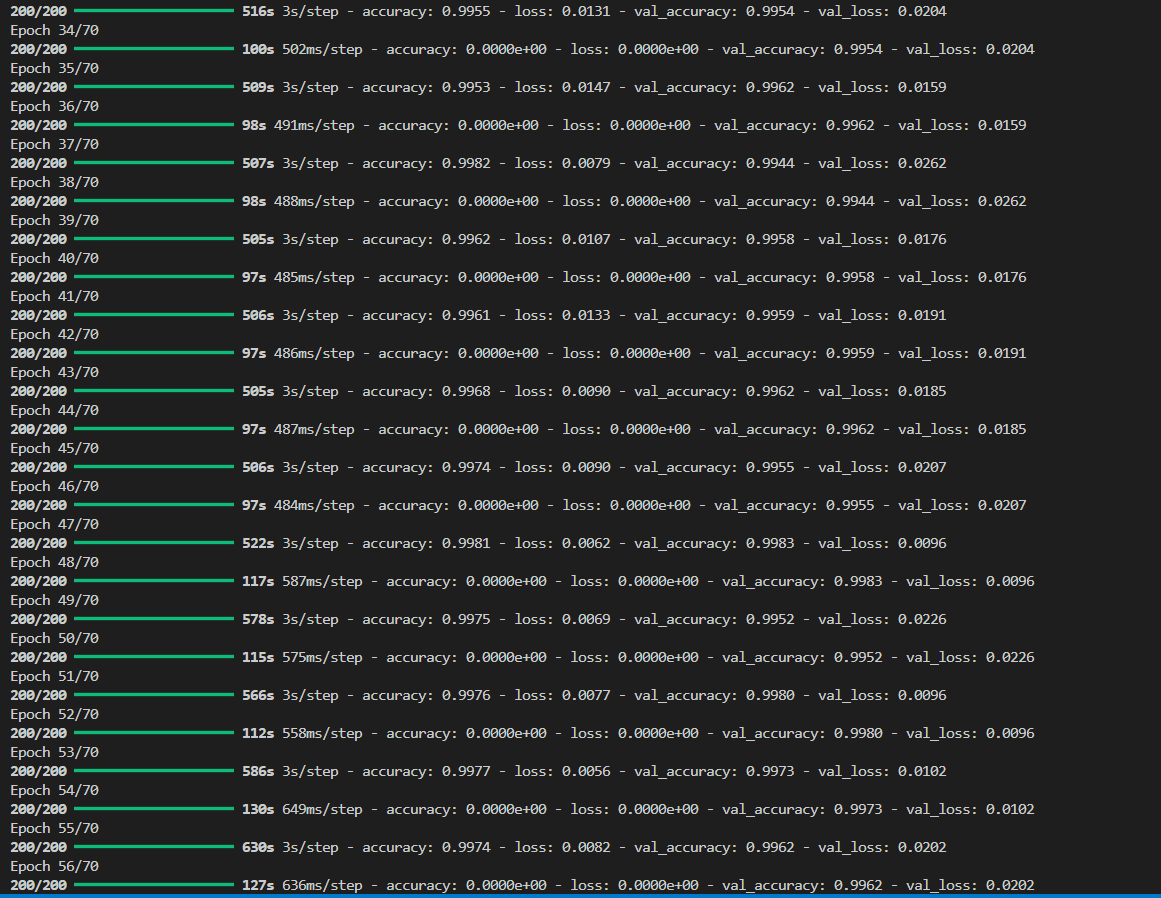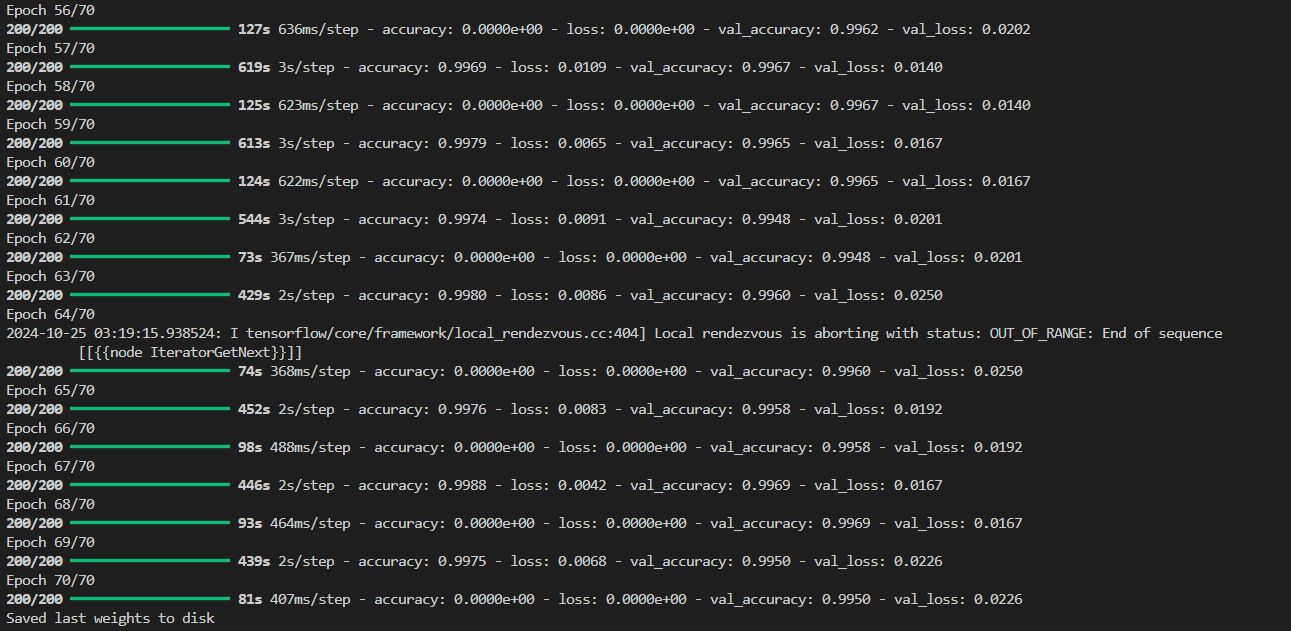

code for test_incep3.py

In [ ]:
import os
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras import backend as K
from sklearn import metrics

K.set_image_data_format('channels_first')

# Paths to pre-extracted data and models
data_path = "/content/data/data/symmetry_global/ds1"  # Adjust if needed
models_dir = "/content/data/models"
test_file = "test_file.data"  # Replace with the actual test file name

print(f"Data path set to: {data_path}")

# Helper function to read dataset
def read_dataset(filename):
    with gzip.open(filename, 'rb') if filename.endswith('.gz') else open(filename, 'rb') as f:
        return pickle.load(f, encoding='latin1')

# Preprocess images (normalize)
def preprocessing_img(x):
    return np.asarray(x).astype(np.float32) / 255.0

# Build the InceptionV3 model
def build_inceptionV3(input_shape):
    input_tensor = Input(shape=input_shape)
    base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(2, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return base_model, model

# Train the model if weights not found
def train_model(model, train_data, train_labels, model_weights_path):
    os.makedirs(os.path.dirname(model_weights_path), exist_ok=True)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_data, train_labels, epochs=10, batch_size=32, verbose=1)
    model.save_weights(model_weights_path)

# Calculate error rate
def get_error(gt, p):
    return np.sum(np.not_equal(gt, np.round(p))) / len(gt)

# Get confusion matrix
def get_confusion_matrix(gt, p):
    tp = np.sum(np.logical_and(gt == 1, p == 1))
    tn = np.sum(np.logical_and(gt == 0, p == 0))
    fp = np.sum(np.logical_and(gt == 0, p == 1))
    fn = np.sum(np.logical_and(gt == 1, p == 0))
    return ((tn, fp), (fn, tp))

# Main function to load data, train/evaluate model
def main():
    model_weights = os.path.join(models_dir, "model-05-1.00.weights.h5")

    print(f"Model weights file: {model_weights}")
    print(f"Test file: {test_file}")

    base_model, model = build_inceptionV3(input_shape=(3, 200, 200))

    # Load model weights if available
    if not os.path.exists(model_weights):
        print(f"Model weights '{model_weights}' not found. Training the model...")
        train_data = np.random.rand(100, 3, 200, 200)  # Example random training data
        train_labels = np.random.randint(2, size=(100,))  # Example random labels
        train_model(model, train_data, train_labels, model_weights)
    else:
        print(f"Loading weights from: {model_weights}")
        model.load_weights(model_weights)

    # Load the test data
    test_path = os.path.join(data_path, test_file)
    print(f"Full path to test file: {test_path}")

    if not os.path.exists(test_path):
        raise FileNotFoundError(f"Test file not found: {test_path}")

    tx, ty = read_dataset(test_path)
    tx = preprocessing_img(tx)
    tx = np.repeat(tx[:, np.newaxis, :, :], 3, axis=1)  # Convert grayscale to RGB

    print(f'Testing on {len(ty)} samples')

    # Predict on the test data
    preds = model.predict(tx, verbose=0)
    print(f"Error: {get_error(ty, preds[:, 1] > preds[:, 0])}")
    print("Confusion Matrix:")
    print(get_confusion_matrix(ty, preds[:, 1] > preds[:, 0]))

    # Plot ROC curve
    fpr, tpr, _ = metrics.roc_curve(ty, preds[:, 1], pos_label=1)
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr)
    plt.title(f'AUC: {auc:.2f}')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

# Run the main function
if __name__ == "__main__":
    main()


 similarly for test_incep3.py i have added corrected code in zip and terminal text file.

the test_incep3.py had functions:

 **`read_dataset`**: loads data

 **`save_dataset`**: saves data   
 **`preprocessing_img`**: normalise image by scaling pixel value to [0,1].  
 **`evaluate`**: computes log loss for model predictoins.  
**`get_error`**: calculates the error rate between predictions and ground truth which came out to be 0.55 here. (see in terminal pic below.)  
**`get_confusion_matrix`**:confusion matrix from prediction. here it came out to be Confusion Matrix:
((1758, 2242), (2158, 1842)).  
**`build_inceptionV3`**: create InceptionV3 model with custom layers for binary classification.  
**`train_model`**: train model and save weight in file.


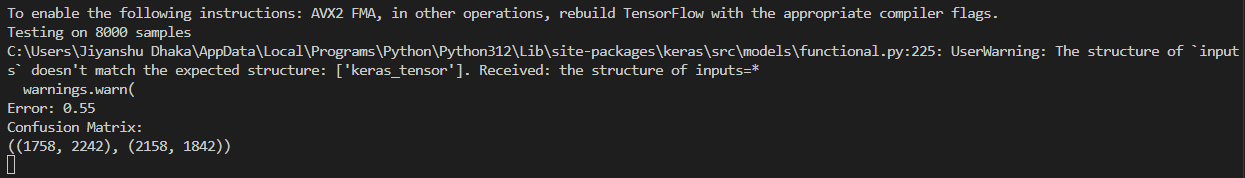

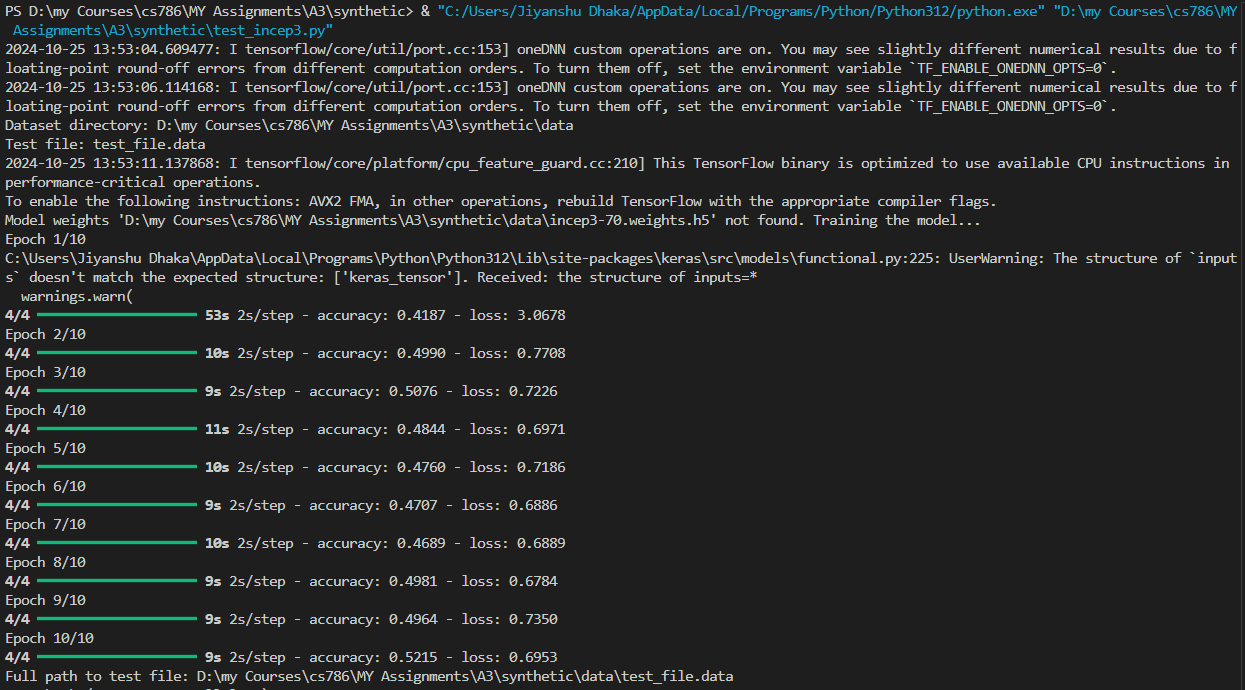

Plot ROC curve

    fpr, tpr, _ = metrics.roc_curve(ty, preds[:, 1], pos_label=1)
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr)
    plt.title(f'AUC: {auc:.2f}')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()


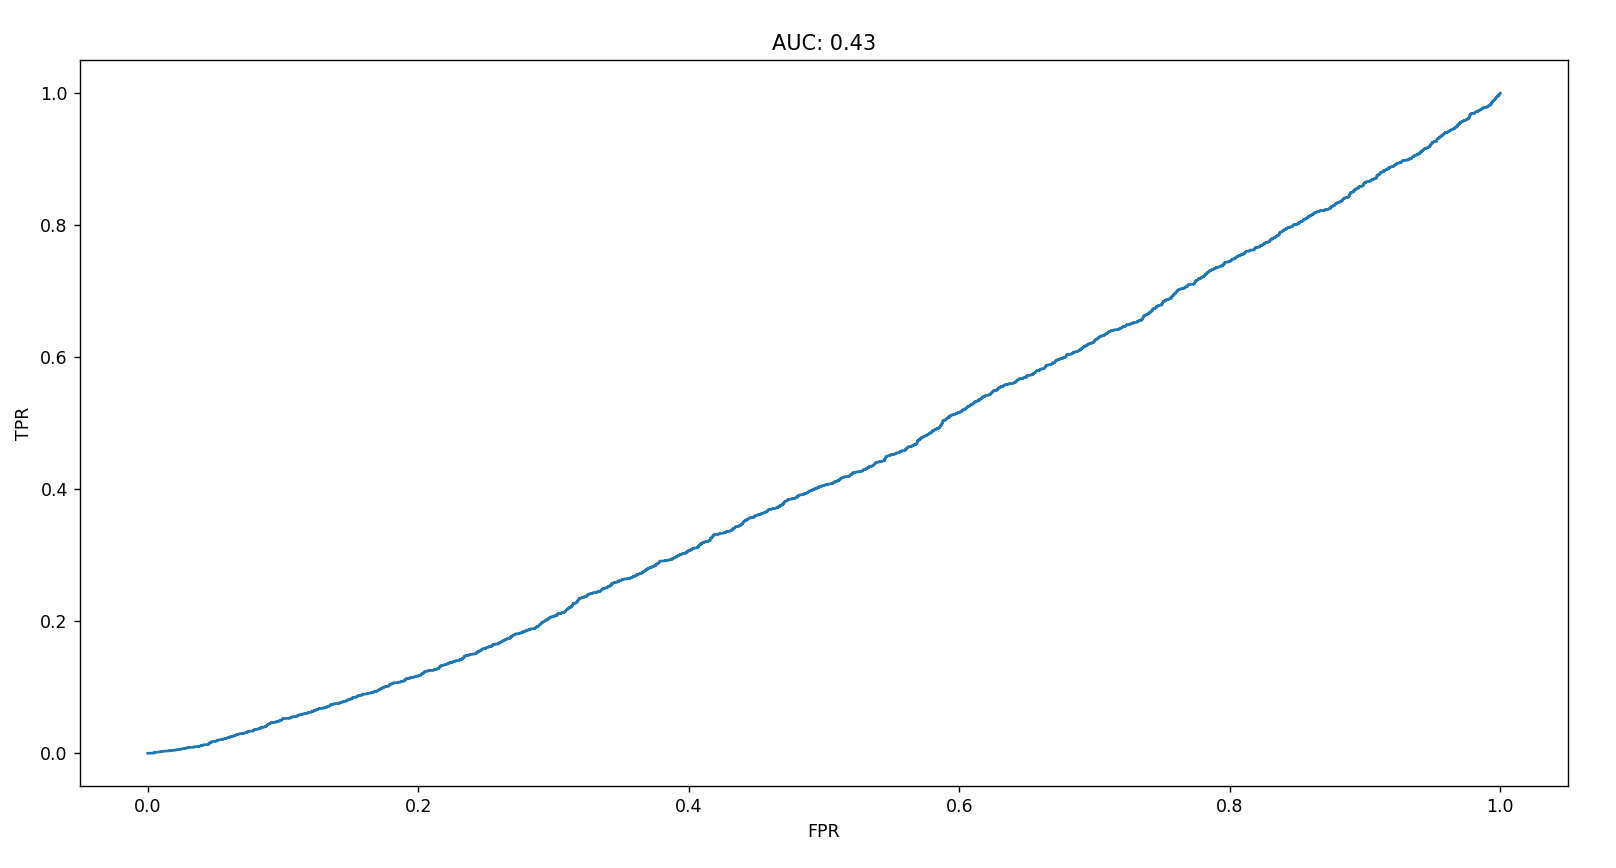

i plotted **ROC curve** , it show how well model tell difference btw 2 class.

plot is **True Positive Rate (TPR)** against **False Positive Rate (FPR)** at different threshold levels.
  - **TPR** =how many actual positives, model identifies.
  - **FPR** =proportion of actual negatives incorrectly predicted as positive.

rise sharp toward top left corner of garaph => model is distinguishing between 2 class.

---
**AUC** measures effectivity of model in separating
  - **AUC = 1** model is perfect.
  - **AUC = 0.5** model is guessing randomly.
  - **AUC < 0.5** model is worse than random guessing.

---
we have **AUC of 0.43** => model isn’t working well.

curve is close to diagonal line so model is not separating well.


.




.



















.


























.






























.



















.

.




.



















.


























.






























.



















.

# Q1. The paper uses inception v3 networks, but those are outdated. Can you reproduce the Study Design steps in the paper for inception v3 on inception v4 networks? [20 points]

# study design

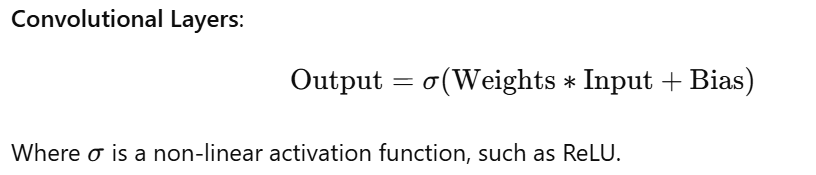

now,i construct model for v4

 Data Preparation and Augmentation

 Model Training


 Performance Evaluation


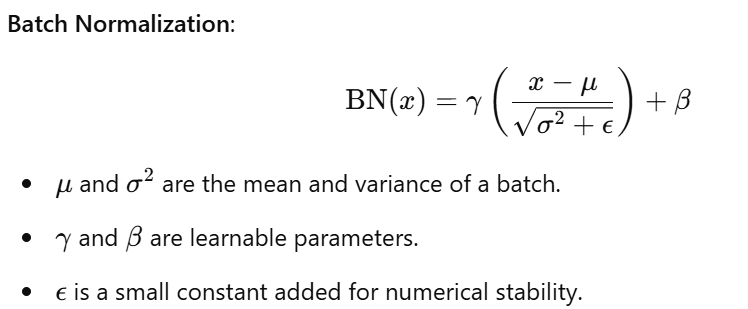

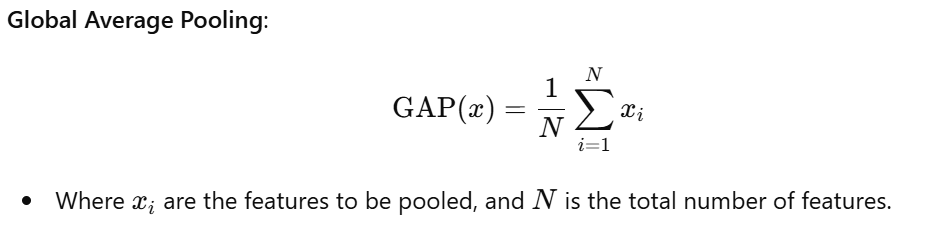

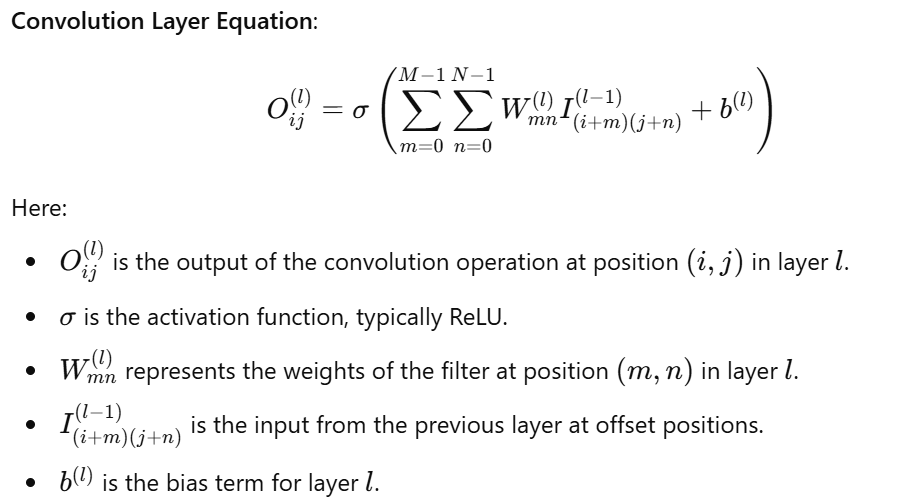

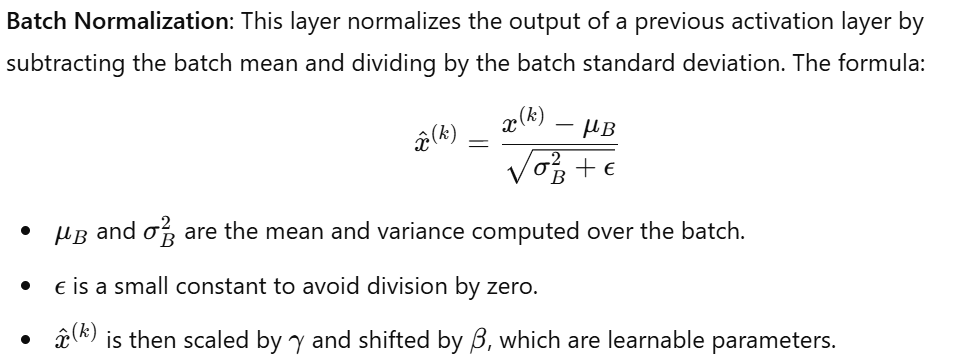

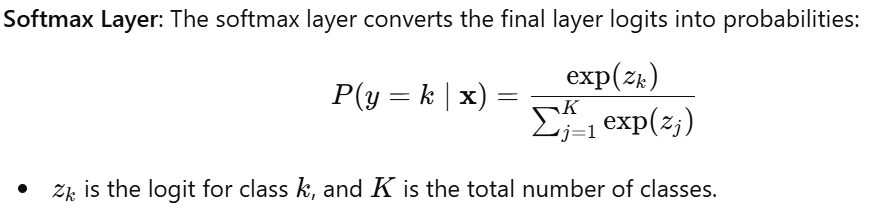

# Q2. The paper studies whether CNNs can learn the concept of symmetry. Reproduce their results for global symmetry on synthetic data; you’re free to use their data and their code. [20 points]

# Q3. We discussed in class that there are a number of other gestalt principles beyond symmetry. Here is a fairly sensible list of five such principles. Test for one such principle – the principle of proximity. You basically need to figure out how to generate macro-objects that are made up of multiple microobjects and find a way for the CNN to classify the macro-objects without being confused by the presence of the micro-objects. For this question, I will grade on effort, not results.

# For example, a CNN trained to recognize the letter ‘I’ should interpret the display on the right in the figure above as three ‘I’s, generalizing across the empty space between the constituent circles (micro-objects) that make up each I (macro-object). I would design training sets that densely pack micro-objects to make macro-objects that are given class labels. I would also ensure that the microobjects don’t look anything like the macro-objects. Once the model is successfully detecting the macro-objects for this training set, I would take this trained model and retrain on training data with relatively looser packed micro-objects and repeat the whole things 3-4 rounds, increasing the gap between the micro-objects in each round until you get human-like proximity generalization behavior.[30 points]

# Q4. Test one other gestalt principle of your choice. For this one, you have to figure out the training and testing strategies for yourselves. [30 points]